# Project: Alternus Vera
## Team: Sigmoid
## Submitted by: Shalini Narang
## Individual Component - Click Bait Analysis




##Abstract
Fake news is a kind of yellow jounalism or a propoganda that is spread via digital media for the benefit of a few. To attract people to click a fake digital content, it has been observed that the title of the article is made attractive, so that the user gets lured just like a fish gets lured to a bait. These title's are known as Clickbaits and its sole intention is to lure humans to websites.

Click-bait has been very creatively depicted in the following image posted in the blog - https://www.theodysseyonline.com/the-art-of-click-bait

<img src="https://s3-us-west-2.amazonaws.com/themodestwhite.com/cb.png"/>

As seen in the image,we find people suggesting not to click on these sites. But for an average user it is quite difficult to identify a clickbait. Facebook understood the sevearity of the problem and started a project to weed out clickbaits from its website.

While working on the project Alternus Vera, our team realized that the title of an article is also very important factor in judging if the digital content is fake or not. By the means of this individual component I have tried to identify if the title is click bait or not.






## Approach

Following flowchart depicts our approach for the click bait analysis. 

<img src="https://s3-us-west-2.amazonaws.com/themodestwhite.com/ml+pro.jpg">


Once we have applied algorithms we will use the click bait score to finally use in finding if the news is fake or not

##Implementation

####Import/Download all packages/libraries required for the project

In [0]:
##https://https://s3-us-west-2.amazonaws.com/themodestwhite.com/fake_real_dataset_spam_category.csv
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")
import re
import string
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as mp
%matplotlib inline


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

####Read the tsv file, keep only title column from the dataset and add new columns required for the component

In [0]:
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/themodestwhite.com/fake_real_dataset_spam_category.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,uuid,ord_in_thread,author,published,title,text,language,crawled,...,main_img_url,replies_count,participants_count,likes,comments,shares,type,content,spam_score_fector,category_fector
0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,...,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,Print They should pay all the back all the mon...,0.993337,business
1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,...,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,Why Did Attorney General Loretta Lynch Plead T...,0.824470,business
2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,...,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,Red State : \r\nFox News Sunday reported this ...,0.998415,business
3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,...,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,Email Kayla Mueller was a prisoner and torture...,0.982233,sport
4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,...,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,0.976653,business


In [0]:
df['fake'] =  np.nan
df['fake'] = np.where(df.type == 'news', 1,0)

df.groupby("fake").describe()

Unnamed: 0                                                                \
          count    mean         std     min      25%     50%      75%     max   
fake                                                                            
0        1997.0   998.0  576.628563     0.0   499.00   998.0  1497.00  1996.0   
1        1714.0  2853.5  494.933497  1997.0  2425.25  2853.5  3281.75  3710.0   

     Unnamed: 0.1            ...    spam_score      spam_score_fector  \
            count    mean    ...           75%  max             count   
fake                         ...                                        
0          1997.0   998.0    ...         0.000  1.0            1997.0   
1          1714.0  2853.5    ...         0.004  1.0            1714.0   

                                                                            
          mean       std       min       25%       50%       75%       max  
fake                                                                        
0     0.961161  0.062693  0.422948  0.954687  0.986242  0.996632  0.999997  
1     0.841592  0.094890  0.419392  0.802866  0.866053  0.901409  0.995544  

[2 rows x 88 columns]

In [0]:
##if title is empty then use first 50 chars of the article.
df['title'] = np.where(df.title.isnull() == True, df.text.str[:50],df.title )

In [0]:
df1 = df[df.isnull().any(axis=1)]

df1.head()

,Unnamed: 0,Unnamed: 0.1,uuid,ord_in_thread,author,published,title,text,language,crawled,...,replies_count,participants_count,likes,comments,shares,type,content,spam_score_fector,category_fector,fake
10,10,10,4d3faf17519cfa46ca754ab8068428818dbb2bf3,0,EdJenner,2016-11-07T22:34:36.822+02:00,YIKES! HILLARY GOES OFF THE RAILS‚Ä¶Pulls A Ho...,,english,2016-11-07T22:34:36.822+02:00,...,0,1,0,0,0,bias,NaN,0.866053,sport,0
59,59,59,b9af57aaf67e5894ea9cee78d8f646aecaa0ebd9,0,tokyowashi (noreply@blogger.com),2016-10-27T06:14:00.000+03:00,#2816: Clinton Pride‚Äôs 8(a) Pig Farm Bridge ...,United States Marine Field McConnell Plum Cit...,english,2016-10-27T07:37:58.775+03:00,...,5,1,0,0,0,bs,United States Marine Field McConnell Plum Cit...,0.998387,tech,0
60,60,60,03905a0f06cb711190aad3934af253a0e1c00a83,1,Anonymous,2016-10-26T23:12:00.000+03:00,"So ,you have Rothschild banksters and British ...","So ,you have Rothschild banksters and British ...",english,2016-10-27T07:37:58.893+03:00,...,5,1,0,0,0,bs,"So ,you have Rothschild banksters and British ...",0.926465,business,0
61,61,61,42c16d3818e64ff4632409cafd309c22df530ac1,2,Anonymous,2016-10-26T22:48:00.000+03:00,Here is the problem . The USA constitution sta...,Here is the problem . The USA constitution sta...,english,2016-10-27T07:37:58.902+03:00,...,5,1,0,0,0,bs,Here is the problem . The USA constitution sta...,0.969930,business,0
62,62,62,336f5dfbea5f263dbdd6ec9be9d1d94d255caa1f,3,Anonymous,2016-10-26T22:35:00.000+03:00,There is plenty of proof the machines are rigg...,There is plenty of proof the machines are rigg...,english,2016-10-27T07:37:58.915+03:00,...,5,1,0,0,0,bs,There is plenty of proof the machines are rigg...,0.985360,sport,0


In [0]:
new_df = df[['title', 'fake']].copy()
new_df['length']=new_df['title'].apply(len)
new_df['caps_ratio'] = np.nan
new_df['question'] = np.nan
new_df['exclamation'] = np.nan
new_df['log_ratio'] = np.nan
new_df['mnb_prob'] = np.nan
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,NaN,NaN,NaN,NaN,NaN
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,NaN,NaN,NaN,NaN,NaN
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,NaN,NaN,NaN,NaN,NaN
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,NaN,NaN,NaN,NaN,NaN
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,NaN,NaN,NaN,NaN,NaN


Text(0.5,0,'Message Length')

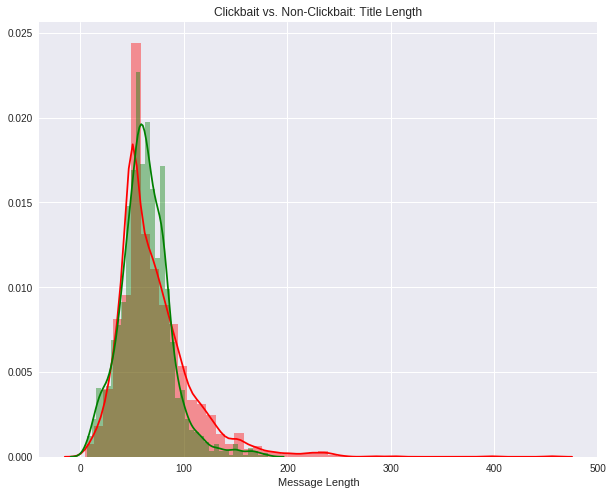

In [0]:
##caps ratio for fake and non fake news
cb_length = new_df[new_df['fake'] == 0]['length']
ncb_length = new_df[new_df['fake'] == 1]['length']

mp.figure(figsize=(10, 8))
mp.title('Clickbait vs. Non-Clickbait: Title Length')
sns.distplot(cb_length, kde = True, color = 'red')
sns.distplot(ncb_length, kde = True, color = 'green')
mp.xlabel('Message Length')

In [0]:
def get_caps_ratio(df):
  for i,row in df.iterrows():
    title=row['title']
    temp_np_title = title.strip(string.punctuation).split()
    np_title = [word.strip(string.punctuation) for word in temp_np_title]
    final_title = [word for word in np_title if word not in set(stopwords.words('english'))]
    final_title = " ".join(final_title)
    num_caps = len([elem for elem in final_title if elem.isupper()])
    num_words = len([elem for elem in final_title if elem == ' ']) + 1
    ratio = num_caps / num_words
    df.loc[i,'caps_ratio']  = ratio
  

In [0]:
get_caps_ratio(new_df)

In [0]:
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,NaN,NaN,NaN,NaN
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,NaN,NaN,NaN,NaN
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,NaN,NaN,NaN,NaN
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,NaN,NaN,NaN,NaN
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,NaN,NaN,NaN,NaN


In [0]:
##caps ratio for fake and non fake news
cb_caps = new_df[new_df['fake'] == 0]['caps_ratio']
ncb_caps = new_df[new_df['fake'] == 1]['caps_ratio']

In [0]:
ncb_caps.head()

1997    1.444444
1998    0.375000
1999    0.444444
2000    1.000000
2001    1.142857
Name: caps_ratio, dtype: float64

In [0]:
ave_cb_caps = np.mean(cb_caps)
print('The average capitalization ratio for clickbait titles is: ' + 
      str(round(ave_cb_caps, 2)))

The average capitalization ratio for clickbait titles is: 1.06


In [0]:
ave_ncb_caps = np.mean(ncb_caps)
print('The average capitalization ratio for non-clickbait titles is: ' + 
      str(round(ave_ncb_caps, 2)))

The average capitalization ratio for non-clickbait titles is: 0.78


Text(0.5,0,'Capitalization Ratio')

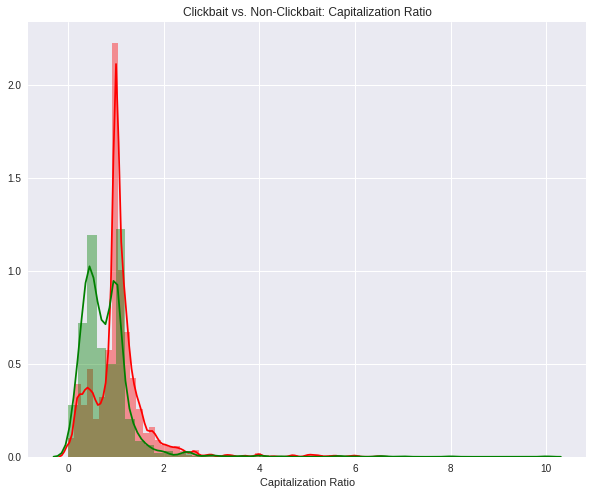

In [0]:
mp.figure(figsize=(10, 8))
mp.title('Clickbait vs. Non-Clickbait: Capitalization Ratio')
sns.distplot(cb_caps, kde = True, color = 'red')
sns.distplot(ncb_caps, kde = True, color = 'green')
mp.xlabel('Capitalization Ratio')

Check if the tile has question mark, and calculate what %age of titles had question

In [0]:
def get_questions(df):
  for i,row in df.iterrows():
    title=row['title']
    if '?' in title:
      df.loc[i,'question']  = 1
    else:
      df.loc[i,'question']  = 0

In [0]:
get_questions(new_df)
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,0.0,NaN,NaN,NaN
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,1.0,NaN,NaN,NaN
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,0.0,NaN,NaN,NaN
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,0.0,NaN,NaN,NaN
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,0.0,NaN,NaN,NaN


In [0]:
cb_questions = new_df[new_df['fake'] == 0]['question']
ncb_questions = new_df[new_df['fake'] == 1]['question']

cb_question_percentage = sum(cb_questions)/len(cb_questions)
print('The percentage of clickbait titles that are questions is: ' +
     str(round(cb_question_percentage * 100, 2)) + '%')

ncb_question_percentage = sum(ncb_questions)/len(ncb_questions)
print('The percentage of non-clickbait titles that are questions is: ' +
     str(round(ncb_question_percentage * 100, 3)) + '%')

The percentage of clickbait titles that are questions is: 7.41%
The percentage of non-clickbait titles that are questions is: 8.635%


([<matplotlib.axis.XTick at 0x7f5a25dd25f8>,
 <a list of 2 Text xticklabel objects>)

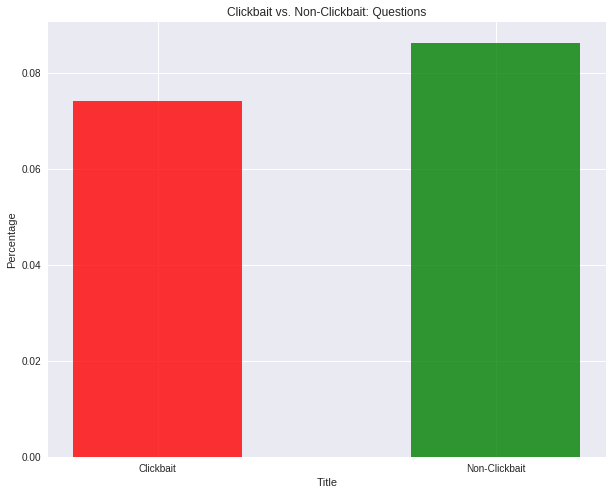

In [0]:
mp.figure(figsize=(10, 8))
mp.title('Clickbait vs. Non-Clickbait: Questions')
mp.bar(
    np.arange(2),
    [cb_question_percentage, ncb_question_percentage],
    align = 'center', 
    width = 0.5,
    alpha = 0.8,
    color = ['red', 'green']
)
mp.xlabel('Title')
mp.ylabel('Percentage')
mp.xticks(np.arange(2), ['Clickbait', 'Non-Clickbait'])

Find the %age of articles having exclamation point

In [0]:
def get_exclamation(df):
  for i,row in df.iterrows():
    title=row['title']
    if '!' in title:
      df.loc[i,'exclamation']  = 1
    else:
      df.loc[i,'exclamation']  = 0

In [0]:
get_exclamation(new_df)
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,0.0,0.0,NaN,NaN
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,1.0,0.0,NaN,NaN
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,0.0,0.0,NaN,NaN
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,0.0,1.0,NaN,NaN
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,0.0,1.0,NaN,NaN


In [0]:
cb_exclamation = new_df[new_df['fake'] == 0]['exclamation']
ncb_exclamation = new_df[new_df['fake'] == 1]['exclamation']

cb_exclamation_percentage = sum(cb_exclamation)/len(cb_exclamation)
print('The percentage of clickbait titles that are exclamation is: ' +
     str(round(cb_exclamation_percentage * 100, 2)) + '%')

ncb_exclamation_percentage = sum(ncb_exclamation)/len(ncb_exclamation)
print('The percentage of non-clickbait titles that are exclamation is: ' +
     str(round(ncb_exclamation_percentage * 100, 3)) + '%')

The percentage of clickbait titles that are exclamation is: 5.16%
The percentage of non-clickbait titles that are exclamation is: 0.933%


([<matplotlib.axis.XTick at 0x7f5a23336f60>,
 <a list of 2 Text xticklabel objects>)

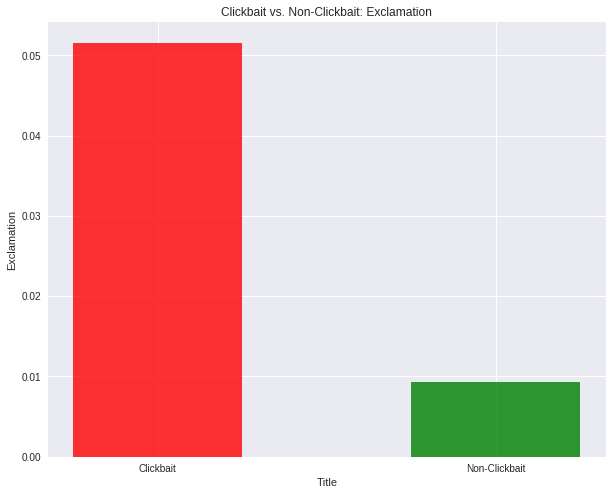

In [0]:
mp.figure(figsize=(10, 8))
mp.title('Clickbait vs. Non-Clickbait: Exclamation')
mp.bar(
    np.arange(2),
    [cb_exclamation_percentage, ncb_exclamation_percentage],
    align = 'center', 
    width = 0.5,
    alpha = 0.8,
    color = ['red', 'green']
)
mp.xlabel('Title')
mp.ylabel('Exclamation')
mp.xticks(np.arange(2), ['Clickbait', 'Non-Clickbait'])

We will use TF-IDF to find the most important words in click bait titles so that we can prepare a vocabulary of the aticles that are click baits.

Some of the steps to be followed are:

1. Convert text to lower case letters
2. Replace / with a space
3. Remove stop words
4. Remove Punctuation 


Apply TFIDF and find the most used words to create a vocabulary

In [0]:
def convert_lower(s):
    s = s.lower()
    return s

new_df['cleaned_title'] = new_df['title'].apply(convert_lower)

In [0]:
def replace_slash(s):
    s = s.replace("/", " ")
    return s

new_df['cleaned_title'] = new_df['cleaned_title'].apply(replace_slash)

In [0]:
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

new_df['cleaned_title'] = new_df['cleaned_title'].apply(remove_punctuation)

In [0]:
def remove_stop_words(s):
    s = ' '.join([word for word in s.split() if word.lower() not in stopwords.words('english')])
    return s

new_df['cleaned_title'] = new_df['cleaned_title'].apply(remove_stop_words)

In [0]:
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob,cleaned_title
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,0.0,0.0,NaN,NaN,muslims busted stole millions gov‚äôt benefits
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,1.0,0.0,NaN,NaN,attorney general loretta lynch plead fifth
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,0.0,0.0,NaN,NaN,breaking weiner cooperating fbi hillary email ...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,0.0,1.0,NaN,NaN,pin drop speech father daughter kidnapped kill...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,0.0,1.0,NaN,NaN,fantastic trumps 7 point plan reform healthcar...


We will get the top 50 words used in fake news or click-baits

In [0]:
fake_news = new_df.loc[df['fake'] == 0]
fake_news.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob,cleaned_title
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,0.0,0.0,NaN,NaN,muslims busted stole millions gov‚äôt benefits
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,1.0,0.0,NaN,NaN,attorney general loretta lynch plead fifth
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,0.0,0.0,NaN,NaN,breaking weiner cooperating fbi hillary email ...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,0.0,1.0,NaN,NaN,pin drop speech father daughter kidnapped kill...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,0.0,1.0,NaN,NaN,fantastic trumps 7 point plan reform healthcar...


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(fake_news['cleaned_title'])

In [0]:
##fetching the top most words used in a fake headline
feature_array = np.array(v.get_feature_names())
tfidf_sorting = np.argsort(x.toarray()).flatten()[::-1]

n = 500
top_n = feature_array[tfidf_sorting][:n]
print(top_n)

['confronting' 'pilger' 'john' 'china' 'interview' 'fate' 'fascism'
 'fascist' 'fascists' 'fastwalkers' 'fat' 'fatal' 'father' 'farrakhan'
 'fault' 'faux' 'favor' 'favorable' 'favorite' 'fbi' 'fbis' 'fck'
 'fascinating' 'farming' 'farms' 'family' 'fakery' 'fall' 'fallacy'
 'falls' 'false' 'fame' 'familiar' 'families' 'famous' 'faith' 'fan'
 'fans' 'fantastic' 'fantasy' 'far' 'farage' 'farm' 'farmer' 'fear'
 'ÿüÿßÿöÿá' 'fearing' 'fearless' 'field' 'fifth' 'fifty' 'fight' 'fighter'
 'fighters' 'fighting' 'figure' 'filed' 'files' 'filipina' 'filipino'
 'filippino' 'fill' 'filling' 'film' 'films' 'filthy' 'final' 'fictitious'
 'fiasco' 'fewer' 'feel' 'fears' 'fed' 'federal' 'federation' 'feds'
 'feed' 'feedback' 'feeding' 'feeling' 'fends' 'fees' 'feet' 'fell'
 'fellow' 'felt' 'fema' 'female' 'fence' 'fake' 'fairbanks' 'finance'
 'failure' 'execution' 'executioners' 'executive' 'exercises' 'existence'
 'existing' 'exit' 'exodus' 'exp' 'expansion' 'expect' 'expectation'
 'expected' 'expel' 

Now that we have the top 50 words of click bait, we will create a word vector using wordtoVec for this newly created vocabulary

In [0]:
import math

##finding out how much probability is that the headline has any of these words
def log_ratio(df, term_column = 'cleaned_title', clickbait_indicator = 'fake'):
    log_ratios = []
    cb_df = df[df[clickbait_indicator] == 0]
    ncb_df = df[df[clickbait_indicator] == 1]
    total_cb_corpus = len(cb_df) + 1
    total_ncb_corpus = len(ncb_df) + 1
    for i,row in df.iterrows():
        term = row[term_column]
        term_frequency_cb = (len(cb_df[cb_df[term_column] == term]) + 1)/total_cb_corpus
        term_frequency_ncb = (len(ncb_df[ncb_df[term_column] == term]) + 1)/total_ncb_corpus
        log_ratios = math.log2(term_frequency_cb/term_frequency_ncb)
        df.loc[i,'log_ratio']  = log_ratios

In [0]:
log_ratio(new_df)

In [0]:
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob,cleaned_title
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,0.0,0.0,0.779652,NaN,muslims busted stole millions gov‚äôt benefits
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,1.0,0.0,0.779652,NaN,attorney general loretta lynch plead fifth
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,0.0,0.0,0.779652,NaN,breaking weiner cooperating fbi hillary email ...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,0.0,1.0,0.779652,NaN,pin drop speech father daughter kidnapped kill...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,0.0,1.0,0.779652,NaN,fantastic trumps 7 point plan reform healthcar...


([<matplotlib.axis.YTick at 0x7f5a231c4f98>,
 <a list of 40 Text yticklabel objects>)

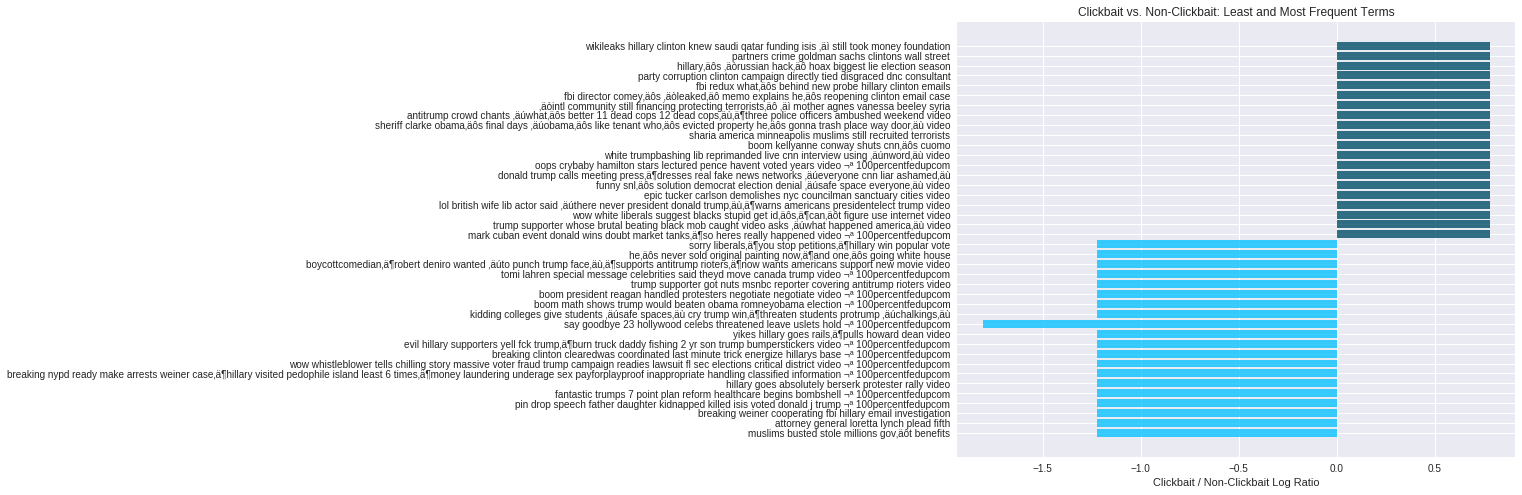

In [0]:
most_likely_cb = new_df[new_df['fake'] == 1].head(20)
least_likely_cb = new_df[new_df['fake'] == 0].head(20)

mp.figure(figsize=(10, 8))
color_scheme = []
least_likely = ['#09C2FF'] * 20 
most_likely = ['#004E68'] * 20
color_scheme += least_likely
color_scheme += most_likely
mp.title('Clickbait vs. Non-Clickbait: Least and Most Frequent Terms')
mp.barh(
    np.arange(len(most_likely_cb) + len(least_likely_cb)),
    most_likely_cb['log_ratio'].append(least_likely_cb['log_ratio']),
    alpha = 0.8,
    color = color_scheme
)
mp.xlabel('Clickbait / Non-Clickbait Log Ratio')
mp.yticks(np.arange(40), new_df['cleaned_title'])

Learning Curve

Before even applying the features, we will see how does the classification algorithm work 

In [0]:
from sklearn.cross_validation import train_test_split

X_headline_text = new_df['cleaned_title']

y = new_df['fake']

tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),ngram_range=(1,2),max_df= 0.85, min_df= 0.01)

X_headline_tfidf = tfidf.fit_transform (X_headline_text).toarray()

X_headline_tfidf.shape

X_headline_tfidf_train, X_headline_tfidf_test, y_headline_train, y_headline_test = train_test_split(X_headline_tfidf,y, test_size = 0.2, random_state=1234)

In [0]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_headline_tfidf_train, y_headline_train)

##print(mnb.predict_proba(X_headline_tfidf_test))

output1 =  mnb.predict_proba(X_headline_tfidf)
new_df['mnb_prob'] = output1[:,0]

In [0]:
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob,cleaned_title
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,0.0,0.0,0.779652,0.954745,muslims busted stole millions gov‚äôt benefits
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,1.0,0.0,0.779652,0.543127,attorney general loretta lynch plead fifth
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,0.0,0.0,0.779652,0.918650,breaking weiner cooperating fbi hillary email ...
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,0.0,1.0,0.779652,0.878160,pin drop speech father daughter kidnapped kill...
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,0.0,1.0,0.779652,0.543127,fantastic trumps 7 point plan reform healthcar...


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score

lr_headline = LogisticRegression(penalty='l1')
lr_headline.fit(X_headline_tfidf_train, y_headline_train)

# get predictions for article section
y_headline_pred = lr_headline.predict(X_headline_tfidf_test)
y_headline_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,

In [0]:
# print metrics
print("Logistig Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_headline_test, y_headline_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_headline_test, y_headline_pred)*100) )

Logistig Regression F1 and Accuracy Scores : 

F1 score 74.02%
Accuracy score 74.16%


In [0]:
from sklearn.ensemble import RandomForestClassifier

rcf_headline = RandomForestClassifier(n_estimators=100,n_jobs=3)

rcf_headline.fit(X_headline_tfidf_train, y_headline_train)
y_rc_headline_pred = rcf_headline.predict(X_headline_tfidf_test)


# print metrics
print("Random Forest F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_headline_test, y_rc_headline_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_headline_test, y_rc_headline_pred)*100) )


Random Forest F1 and Accuracy Scores : 

F1 score 73.89%
Accuracy score 74.02%


In [0]:
from xgboost import XGBClassifier

xgb_headline = XGBClassifier()

xgb_headline.fit(X_headline_tfidf_train, y_headline_train)
y_xgb_headline_pred = xgb_headline.predict(X_headline_tfidf_test)

y_xgb_headline_pred

# print metrics
print("XGBoost F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_headline_test, y_xgb_headline_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_headline_test, y_xgb_headline_pred)*100) )

XGBoost F1 and Accuracy Scores : 

F1 score 73.05%
Accuracy score 73.35%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


By using above algorithms, we ffound that random forest performed better than the three used.

In comming week, I will add feature selection and then compare the reslt.


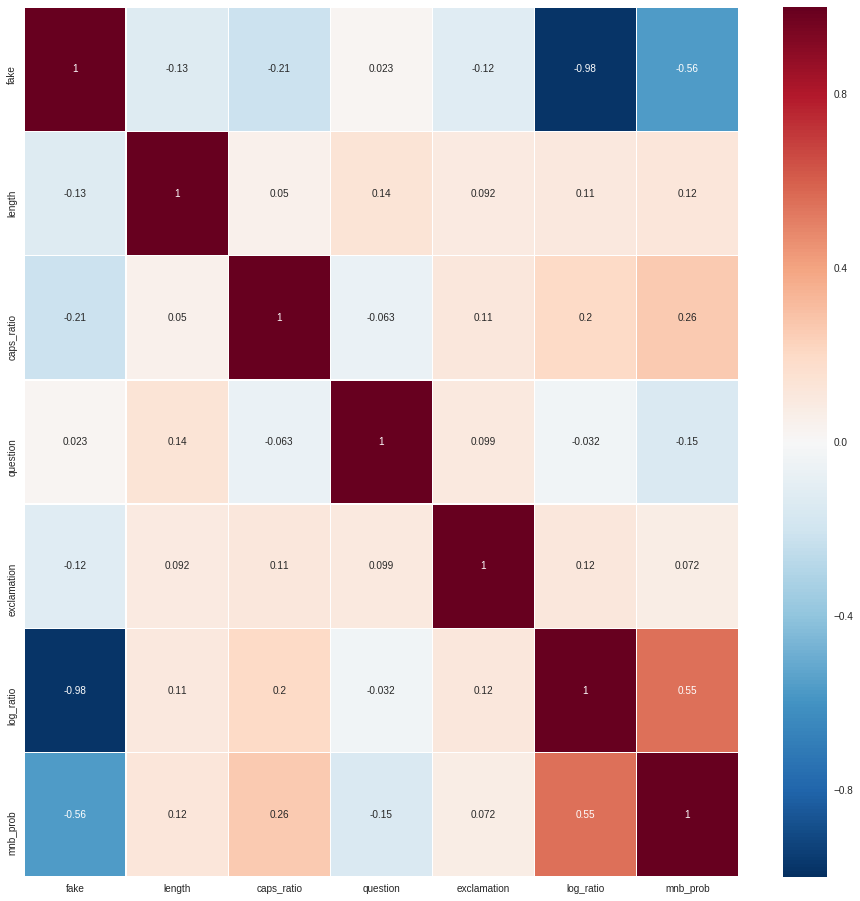

In [0]:
##Let's see the correlation between all the newly added features to come up with a weighted parameter
#shows corelation between columns in matrix form
tc = new_df.corr()   
# Plotting corelation
mp.figure(figsize=(16, 16))
sns.heatmap(tc, annot=True, linewidths=.5)

In [0]:
###Now using all other feature columns we have added in the dataset
X_train, X_test, y_train, y_test = train_test_split(
    new_df[['caps_ratio', 'exclamation', 'question','log_ratio','mnb_prob']],
    new_df['fake'],
    random_state = 42,
    test_size = 0
)

# Logistic Regression Classification
logistic_regression = LogisticRegression()
logistic_regression = logistic_regression.fit(X_train, y_train)
print(logistic_regression.predict_proba(X_train))


output1 =  logistic_regression.predict_proba(X_train)
new_df['click_bait_score'] = output1[:,0]


# Logistic Regression Holdout Test
#print('The Logistic Regression classifier performed with a '+ 
#      str(sum(logistic_regression.predict(X_test) == np.array(y_test))/len(y_test) * 100) + 
 #     '% accuracy on test data')
  
  
  ##review - another column and consider some embeddings - combined embeddings, contect vectors, compare and contrast which performs better , add dimension of multiple embeddings 

[[9.99951485e-01 4.85154228e-05]
 [9.97981080e-01 2.01891958e-03]
 [1.11298365e-03 9.98887016e-01]
 ...
 [9.97736580e-01 2.26342001e-03]
 [1.69600617e-03 9.98303994e-01]
 [1.66727639e-03 9.98332724e-01]]


In [0]:
new_df.head()

,title,fake,length,caps_ratio,question,exclamation,log_ratio,mnb_prob,cleaned_title,click_bait_score
0,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,0,55,1.750000,0.0,0.0,0.779652,0.954745,muslims busted stole millions gov‚äôt benefits,0.999951
1,Re: Why Did Attorney General Loretta Lynch Ple...,0,59,1.000000,1.0,0.0,0.779652,0.543127,attorney general loretta lynch plead fifth,0.997981
2,BREAKING: Weiner Cooperating With FBI On Hilla...,0,68,2.000000,0.0,0.0,0.779652,0.918650,breaking weiner cooperating fbi hillary email ...,0.001113
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0,126,2.315789,0.0,1.0,0.779652,0.878160,pin drop speech father daughter kidnapped kill...,0.001539
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0,100,2.285714,0.0,1.0,0.779652,0.543127,fantastic trumps 7 point plan reform healthcar...,0.998544


In [0]:
##copy this click_bait score to the original data frame

df['click_bait_score'] = new_df['click_bait_score']

df.head()

,Unnamed: 0,Unnamed: 0.1,uuid,ord_in_thread,author,published,title,text,language,crawled,...,participants_count,likes,comments,shares,type,content,spam_score_fector,category_fector,fake,click_bait_score
0,0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,...,1,0,0,0,bias,Print They should pay all the back all the mon...,0.993337,business,0,0.999951
1,1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,...,1,0,0,0,bias,Why Did Attorney General Loretta Lynch Plead T...,0.824470,business,0,0.997981
2,2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,...,1,0,0,0,bias,Red State : \r\nFox News Sunday reported this ...,0.998415,business,0,0.001113
3,3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,...,0,0,0,0,bias,Email Kayla Mueller was a prisoner and torture...,0.982233,sport,0,0.001539
4,4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,...,0,0,0,0,bias,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,0.976653,business,0,0.998544


In [0]:
df.to_csv('fake_real_dataset_spam_category_clickbait.csv')

from google.colab import files
files.download('fake_real_dataset_spam_category_clickbait.csv')